<a href="https://colab.research.google.com/github/desireesosa/EDP1/blob/main/IntegraldeFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integral de Fourier** \\
*Considere la función pulso unitario: f(x)=1 si -1 <= x <= 1, 0 en otro caso.*



a)  Grafique la función.

b)  Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.

c)  Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso b).



**Inciso a)** *Graficando la funcion $f(x)=1, si -1<=x<=1$*

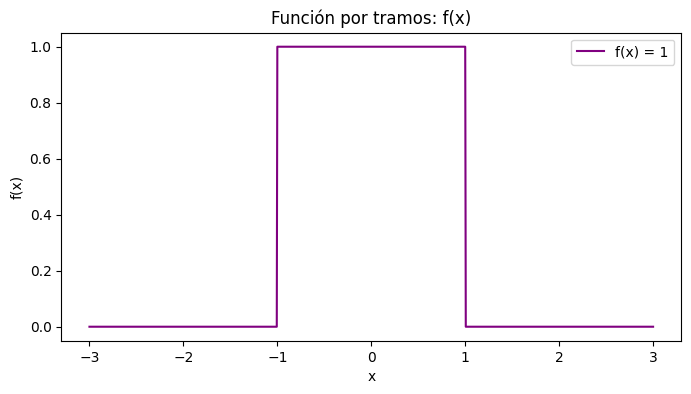

In [41]:
#programa que grafique la funcion pulso unitario
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad

def pulso_unitario(x):
    return np.where((-1 <= x) & (x <= 1), 1, 0)

x = np.linspace(-3, 3, 1000)
y = pulso_unitario(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='f(x) = 1', color='purple')
plt.title('Función por tramos: f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

**Inciso b)** *Calcule su representación como integral de Fourier*

In [43]:
#Calcule su representación como integral de Fourier

def fourier_transform(w):
  return 2 * np.sinc(w / np.pi)

def fourier_integral_reconstruction(x_val):
    integrand = lambda w: fourier_transform(w) * np.exp(1j * w * x_val)
    result, _ = quad(lambda w: np.real(integrand(w)), -100, 100)
    return result / (2 * np.pi)

x_vals = np.linspace(-5, 5, 400)
f_vals = pulso_unitario(x_vals)
reconstructed_vals = np.array([fourier_integral_reconstruction(x_val) for x_val in x_vals])


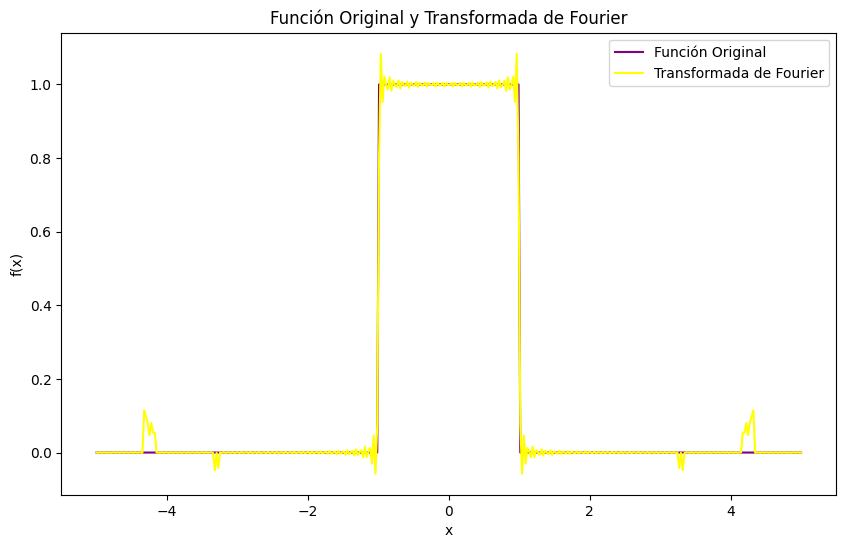

In [44]:
#graficando la transformada sobre la funcion original

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='Función Original', color='purple')
plt.plot(x_vals, reconstructed_vals, label='Transformada de Fourier', color='yellow')
plt.title('Función Original y Transformada de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

**Inciso c)** *Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre*

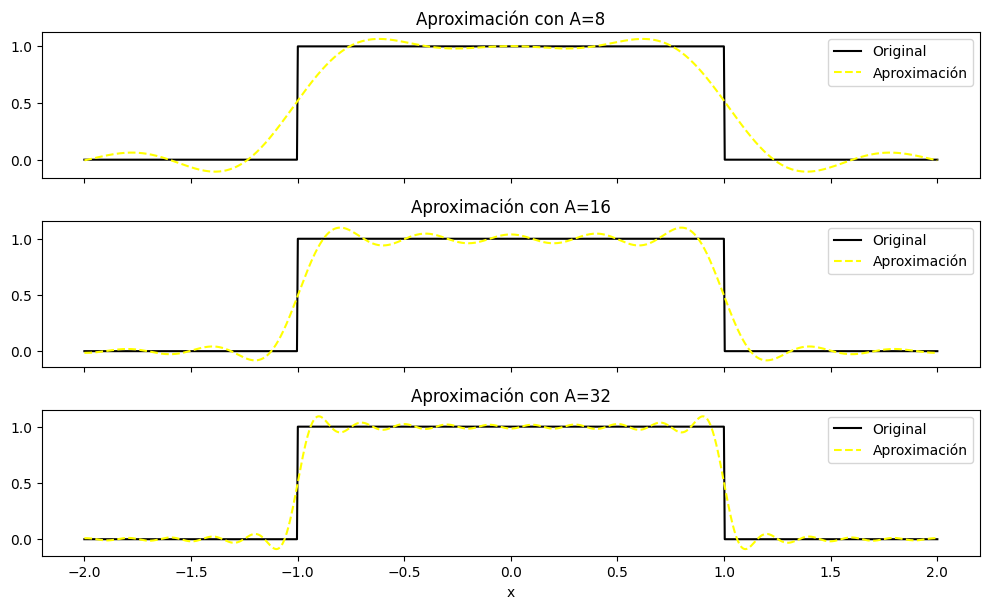

In [60]:
#Se dan valores finitos al extremo superior de la integral

x_plot = np.linspace(-2, 2, 1000)
w=sp.symbols('w')
x=sp.symbols('x')
x_valores=sp.Symbol('x', real=True)

F_w = 2 * sp.sin(w) / w

fig, ax = plt.subplots(3,1,figsize=(10, 6), sharex=True)
A_valores = [8, 16, 32]
for i, A in enumerate(A_valores):
   integral_aprox= (1/sp.pi) * sp.integrate(F_w * sp.cos(w*x), (w, 0, A))
   f_aprox_func = sp.lambdify(x_valores, integral_aprox)
   y_aprox = np.array([f_aprox_func(val) for val in x_plot])

   ax[i].plot(x_plot, pulso_unitario(x_plot), "k", label="Original")
   ax[i].plot(x_plot, y_aprox, "--", label="Aproximación", color="yellow")
   ax[i].set_title(f"Aproximación con A={A}")
   ax[i].legend()

plt.tight_layout()
plt.xlabel("x")
plt.show()